In [7]:
pip install pandas



   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
    --------------------------------------- 0.2/11.5 MB 5.9 MB/s eta 0:00:02
   - -------------------------------------- 0.6/11.5 MB 7.0 MB/s eta 0:00:02
   --- ------------------------------------ 0.9/11.5 MB 7.5 MB/s eta 0:00:02
   ---- ----------------------------------- 1.3/11.5 MB 7.3 MB/s eta 0:00:02
   ----- ---------------------------------- 1.6/11.5 MB 7.8 MB/s eta 0:00:02
   ------- -------------------------------- 2.1/11.5 MB 7.9 MB/s eta 0:00:02
   -------- ------------------------------- 2.5/11.5 MB 8.6 MB/s eta 0:00:02
   ---------- ----------------------------- 3.0/11.5 MB 8.2 MB/s eta 0:00:02
   ------------ --------------------------- 3.6/11.5 MB 8.8 MB/s eta 0:00:01
   -------------- ------------------------- 4.2/11.5 MB 8.9 MB/s eta 0:00:01
   ---------------- ----------------------- 4.8/11.5 MB 9.5 MB/s eta 0:00:01
   ------------------ --------------------- 5.3/11.5 MB 9.5 MB/s eta 0:00:01
   --

X_train: (11610, 8)
X_test: (5160, 8)
X_valid: (3870, 8)
y_train: (11610,)
y_test: (5160,)
y_valid: (3870,)


c:\Users\jaime\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.9357 - mean_absolute_percentage_error: 47.7631 - root_mean_squared_error: 1.3730 - val_loss: 0.5942 - val_mean_absolute_percentage_error: 34.6163 - val_root_mean_squared_error: 0.7709
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5131 - mean_absolute_percentage_error: 31.4866 - root_mean_squared_error: 0.7163 - val_loss: 0.4933 - val_mean_absolute_percentage_error: 27.5341 - val_root_mean_squared_error: 0.7024
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4748 - mean_absolute_percentage_error: 28.4693 - root_mean_squared_error: 0.6890 - val_loss: 0.4610 - val_mean_absolute_percentage_error: 26.1016 - val_root_mean_squared_error: 0.6790
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4478 - mean_absolute_percentage_error: 27.2563 - root_mean_squared_error: 0.6691 - val_loss: 0.4475 - val_mean_absolute_percentage_error: 25.6423 - val_root_mean_squared_error: 0.6690
Epoch 5/10
363/3

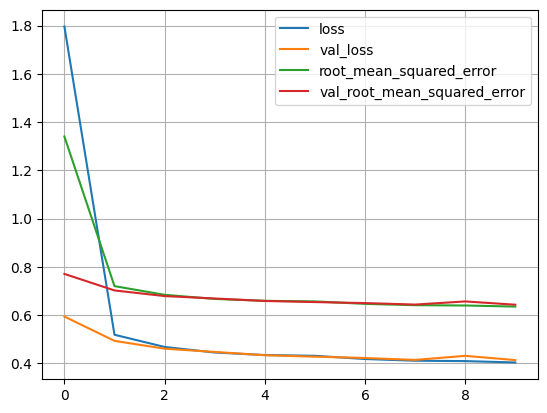

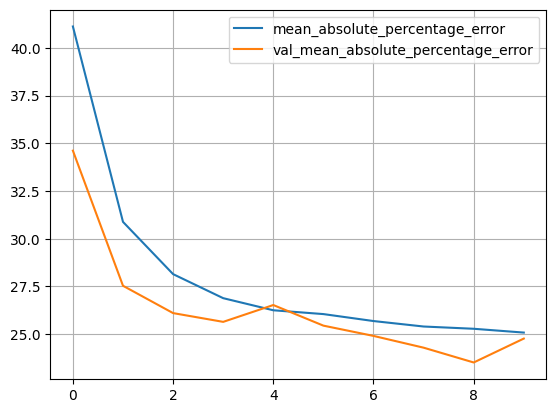

In [10]:

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import keras



# Cargar el conjunto de datos housing
housing = fetch_california_housing()  # Asignar el resultado a 'housing'

# Crear conjuntos de datos de entrenamiento, validación y prueba
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
# ... (resto del código)


#Crear conjuntos de datos de entrenamiento, validación y prueba
X_train_full, X_test, y_train_full, y_test = train_test_split (housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split (X_train_full, y_train_full)
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('X_valid:',X_valid.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)
print('y_valid:',y_valid.shape)

#Escalar los datos
scaler = StandardScaler ()
X_train = scaler.fit_transform (X_train) 
X_test = scaler.transform (X_test) 
X_valid = scaler.transform (X_valid)

#Crear el modelo de red neuronal:
model = keras.models.Sequential ([keras.layers. Dense (30, activation='relu',input_shape=X_train.shape[1:]),
keras.layers. Dense (1) ])


#Compilar el modelo:
model.compile (loss='mean_squared_error', optimizer='sgd',
metrics=[keras.metrics.RootMeanSquaredError(), 'mean_absolute_percentage_error'])



#Entrenar el modelo
history = model.fit (X_train, y_train,
epochs=10,
validation_data=(X_valid, y_valid))

#Graficar el historial de entrenamiento:
dfHistory = pd.DataFrame (history.history)

dfHistory[['loss', 'val_loss', 'root_mean_squared_error', 'val_root_mean_squared_error']].plot (grid=True)
dfHistory[['mean_absolute_percentage_error',
'val_mean_absolute_percentage_error']].plot(grid=True)


#Evaluar el modelo en el conjunto de entrenamiento
loss, RMSE, MAPE = model.evaluate(X_train, y_train) 
print ("Evaluar el modelo en el conjunto de entrenamiento") 
print ("loss train:", loss)
print("root_mean_squared_error train: ", RMSE) 
print("mean_absolute_percentage_error train:", MAPE)
#Evaluar el modelo en el conjunto de validacion 
loss, RMSE, MAPE = model.evaluate(X_valid, y_valid) 
print ("Evaluar el modelo en el conjunto de validacion") 
print("loss valid:", loss)
print("root_mean_squared_error valid: ", RMSE) 
print("mean_absolute_percentage_error valid:", MAPE)
#Evaluar el modelo en el conjunto de prueba 
loss, RMSE, MAPE = model.evaluate(X_test, y_test) 
print ("Evaluar el modelo en el conjunto de prueba") 
print("loss test:", loss)
print("root_mean_squared_error test:", RMSE) 
print("mean_absolute_percentage_error test:", MAPE)